# Dimension and Rank

In [1]:
# for conversion to PDF use these settings
# %matplotlib inline
# qr_setting = 'url'
# qrviz_setting = 'show'
#
# for lecture use notebook
%matplotlib notebook
qr_setting = 'url'
qrviz_setting = 'save'
#
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
reload(sl)
reload(ut);

$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}$
$\newcommand{\vx}<p><strong>SyntaxError</strong>: unexpected character after line continuation character (<ipython-input-2-ab34db0b16f5>, line 1)</p>
$
$\newcommand{\hx}{\hat{\mathbf x}}$
$\newcommand{\vbt}<p><strong>SyntaxError</strong>: unexpected character after line continuation character (<ipython-input-2-498352401d25>, line 1)</p>
$
$\newcommand{\vy}<p><strong>SyntaxError</strong>: unexpected character after line continuation character (<ipython-input-2-a977bb6e3675>, line 1)</p>
$
$\newcommand{\vz}<p><strong>SyntaxError</strong>: unexpected character after line continuation character (<ipython-input-2-dc917f61b66e>, line 1)</p>
$
$\newcommand{\R}<p><strong>SyntaxError</strong>: unexpected character after line continuation character (<ipython-input-2-26d42e8211cf>, line 1)</p>
}$
$\newcommand{\vu}<p><strong>SyntaxError</strong>: unexpected character after line continuation character (<ipython-input-2-2645e7979d77>, line 1)</p>
$
$\newcommand{\vv}<p><strong>SyntaxError</strong>: unexpected character after line continuation character (<ipython-input-2-0802909d0b3d>, line 1)</p>
$
$\newcommand{\vw}<p><strong>SyntaxError</strong>: unexpected character after line continuation character (<ipython-input-2-da3c1954a9b0>, line 1)</p>
$
$\newcommand{\col}<p><strong>SyntaxError</strong>: unexpected character after line continuation character (<ipython-input-2-ac0f89568240>, line 1)</p>
}$
$\newcommand{\nul}<p><strong>SyntaxError</strong>: unexpected character after line continuation character (<ipython-input-2-f385b48d8597>, line 1)</p>
}$
$\newcommand{\vb}<p><strong>SyntaxError</strong>: unexpected character after line continuation character (<ipython-input-2-15d56b6f9af8>, line 1)</p>
$
$\newcommand{\va}<p><strong>SyntaxError</strong>: unexpected character after line continuation character (<ipython-input-2-a6a446e024fa>, line 1)</p>
$
$\newcommand{\ve}<p><strong>SyntaxError</strong>: unexpected character after line continuation character (<ipython-input-2-2d0c00f56cfc>, line 1)</p>
$
$\newcommand{\setb}<p><strong>SyntaxError</strong>: unexpected character after line continuation character (<ipython-input-2-3c7bf144048a>, line 1)</p>
}$
$\newcommand{\rank}<p><strong>SyntaxError</strong>: unexpected character after line continuation character (<ipython-input-2-032636eb19d1>, line 1)</p>
}$
$\newcommand{\vp}<p><strong>SyntaxError</strong>: unexpected character after line continuation character (<ipython-input-2-574a3ccf7593>, line 1)</p>
$

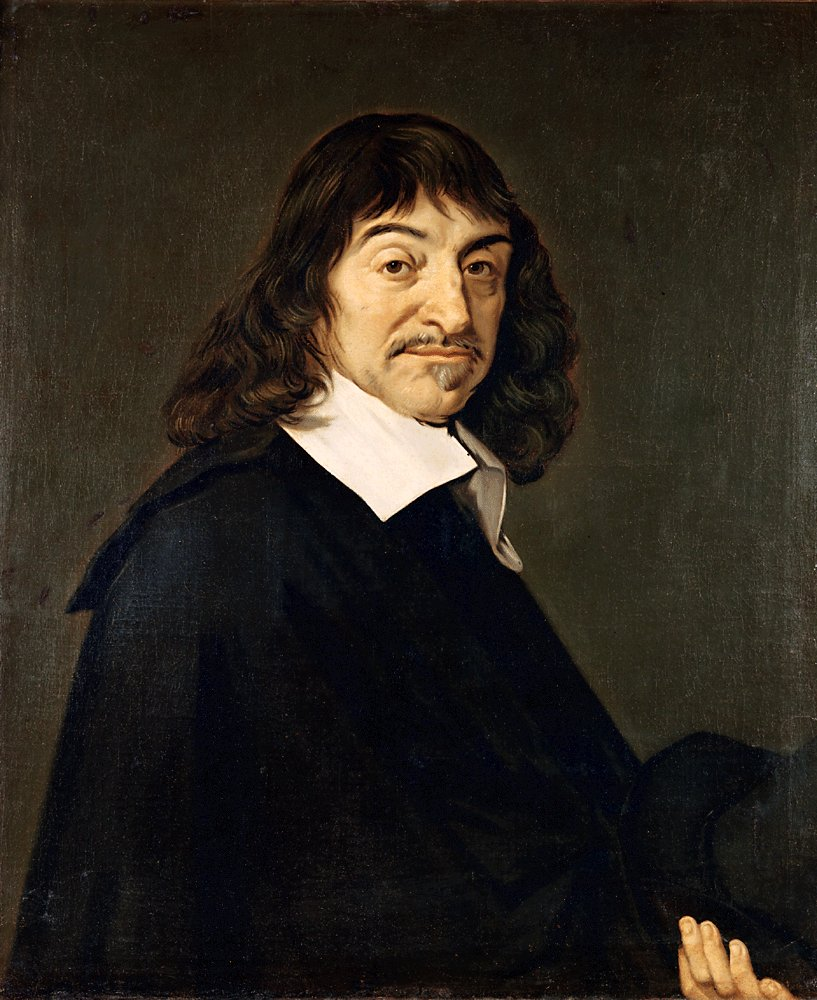

In [2]:
# Source: http://en.wikipedia.org/wiki/Ren%C3%A9_Descartes#/media/File:Frans_Hals_-_Portret_van_Ren%C3%A9_Descartes.jpg
# More background is at http://mathforum.org/cgraph/history/middleages.html
display(Image("images/descartes.jpg", width=400))

In [3]:
HTML(u'<a href="http://commons.wikimedia.org/wiki/File:Frans_Hals_-_Portret_van_Ren%C3%A9_Descartes.jpg#/media/File:Frans_Hals_-_Portret_van_Ren%C3%A9_Descartes.jpg">"Frans Hals - Portret van René Descartes</a>" by After <a href="//en.wikipedia.org/wiki/Frans_Hals" class="extiw" title="en:Frans Hals">Frans Hals</a> (1582/1583–1666) - André Hatala [e.a.] (1997) De eeuw van Rembrandt, Bruxelles: Crédit communal de Belgique, <a href="//commons.wikimedia.org/wiki/Special:BookSources/2908388324" class="internal mw-magiclink-isbn">ISBN 2-908388-32-4</a>.. Licensed under Public Domain via <a href="//commons.wikimedia.org/wiki/">Wikimedia Commons</a>.')

Rene Descartes (1596-1650) was a French philosopher, mathematician, and writer.  He is often credited with developing the idea of a coordinate system, although versions of coordinate systems had been seen in Greek mathematics since 300BC.  

As a young man, Descartes had health problems and generally stayed in bed late each day.  The story goes that one day as he lay in bed, he observed a fly on the ceiling of his room.  He thought about how to describe the movement of the fly, and realized that he could completely describe it by measuring its distance from the walls of the room.  This gave birth to the so-called _Cartesian coordinate system_.

What is certain is that Descartes championed the idea that geometric problems could be cast into algebraic form and solved in that fashion.  This was an important shift in thinking; the mathematical tradition begun by the Greeks held that geometry, as practiced by Euclid with compass and straightedge, was a more fundamental approach.  For example, the problem of copying a triangle was one that the Greeks had studied and solved using non-numeric methods.  Descartes argued that a triangle could be copied exactly by simply knowing the coordinates of its vertices.

The study of curves and shapes in algebraic form laid important groundwork for calculus, and Newton was strongly influenced by Descartes' ideas.

Why is a coordinate system so useful?

The value of a coordinate system is that it gives a _unique name_ to each point in the plane (or in any vector space).


Now, here is a key question:  what if the walls of Descartes' room had not been square (perpendicular)?   

Would his system still have worked?

In other words, would he still have been able to precisely specify the path of the fly?

We'll explore this question today and use it to further deepen our understanding of linear operators.

## Coordinate Systems

In the last lecture we developed the idea of a _basis_ -- a minimal spanning set for a subspace $H$.

Today we'll emphasize this aspect: a key value of a basis is that it provides a _coordinate system_ for $H$.

In other words: if we are given a basis for $H$, then __each vector in $H$ can be written in only one way__ as a linear combination of the basis vectors.

Let's see this convincingly.

Suppose $\setb\ = \{\vb_1,\dots,\vb_p\}$ is a basis for $H,$ and suppose a vector $\vx$ in $H$ can be generated in two ways, say

$$\vx = c_1\vb_1+\cdots+c_p\vb_p\;\;\;\;\mbox{and}\;\;\;\;\vx = d_1\vb_1+\cdots+d_p\vb_p.$$

Then, subtracting gives

$${\bf 0} = \vx - \vx = (c_1-d_1)\vb_1+\cdots+(c_p-d_p)\vb_p.$$

Since $\setb$ is a basis, we know that it is linearly independent.

So by the definition of linear independence, the weights in the above expression must all be zero.  

That is, $c_j = d_j$ for all $j$ -- which shows that the two representations must be the same.

__Definition.__  Suppose the set $\setb\ = \{\vb_1,\dots,\vb_p\}$ is a basis for the subspace $H$.  For each $\vx$ in $H$, the __coordinates of $\vx$ relative to the basis $\setb$__ are the weights $c_1,\dots,c_p$ such that $\vx = c_1\vb_1+\cdots+c_p\vb_p$. 

The vector in $\R^p$

$$[\vx]_\setb = \mat{{c}c_1\\\vdots\\c_p}$$

is called the __coordinate vector of $\vx$ (relative to $\setb$)__ or the __$\setb$-coordinate vector of $\vx$.__

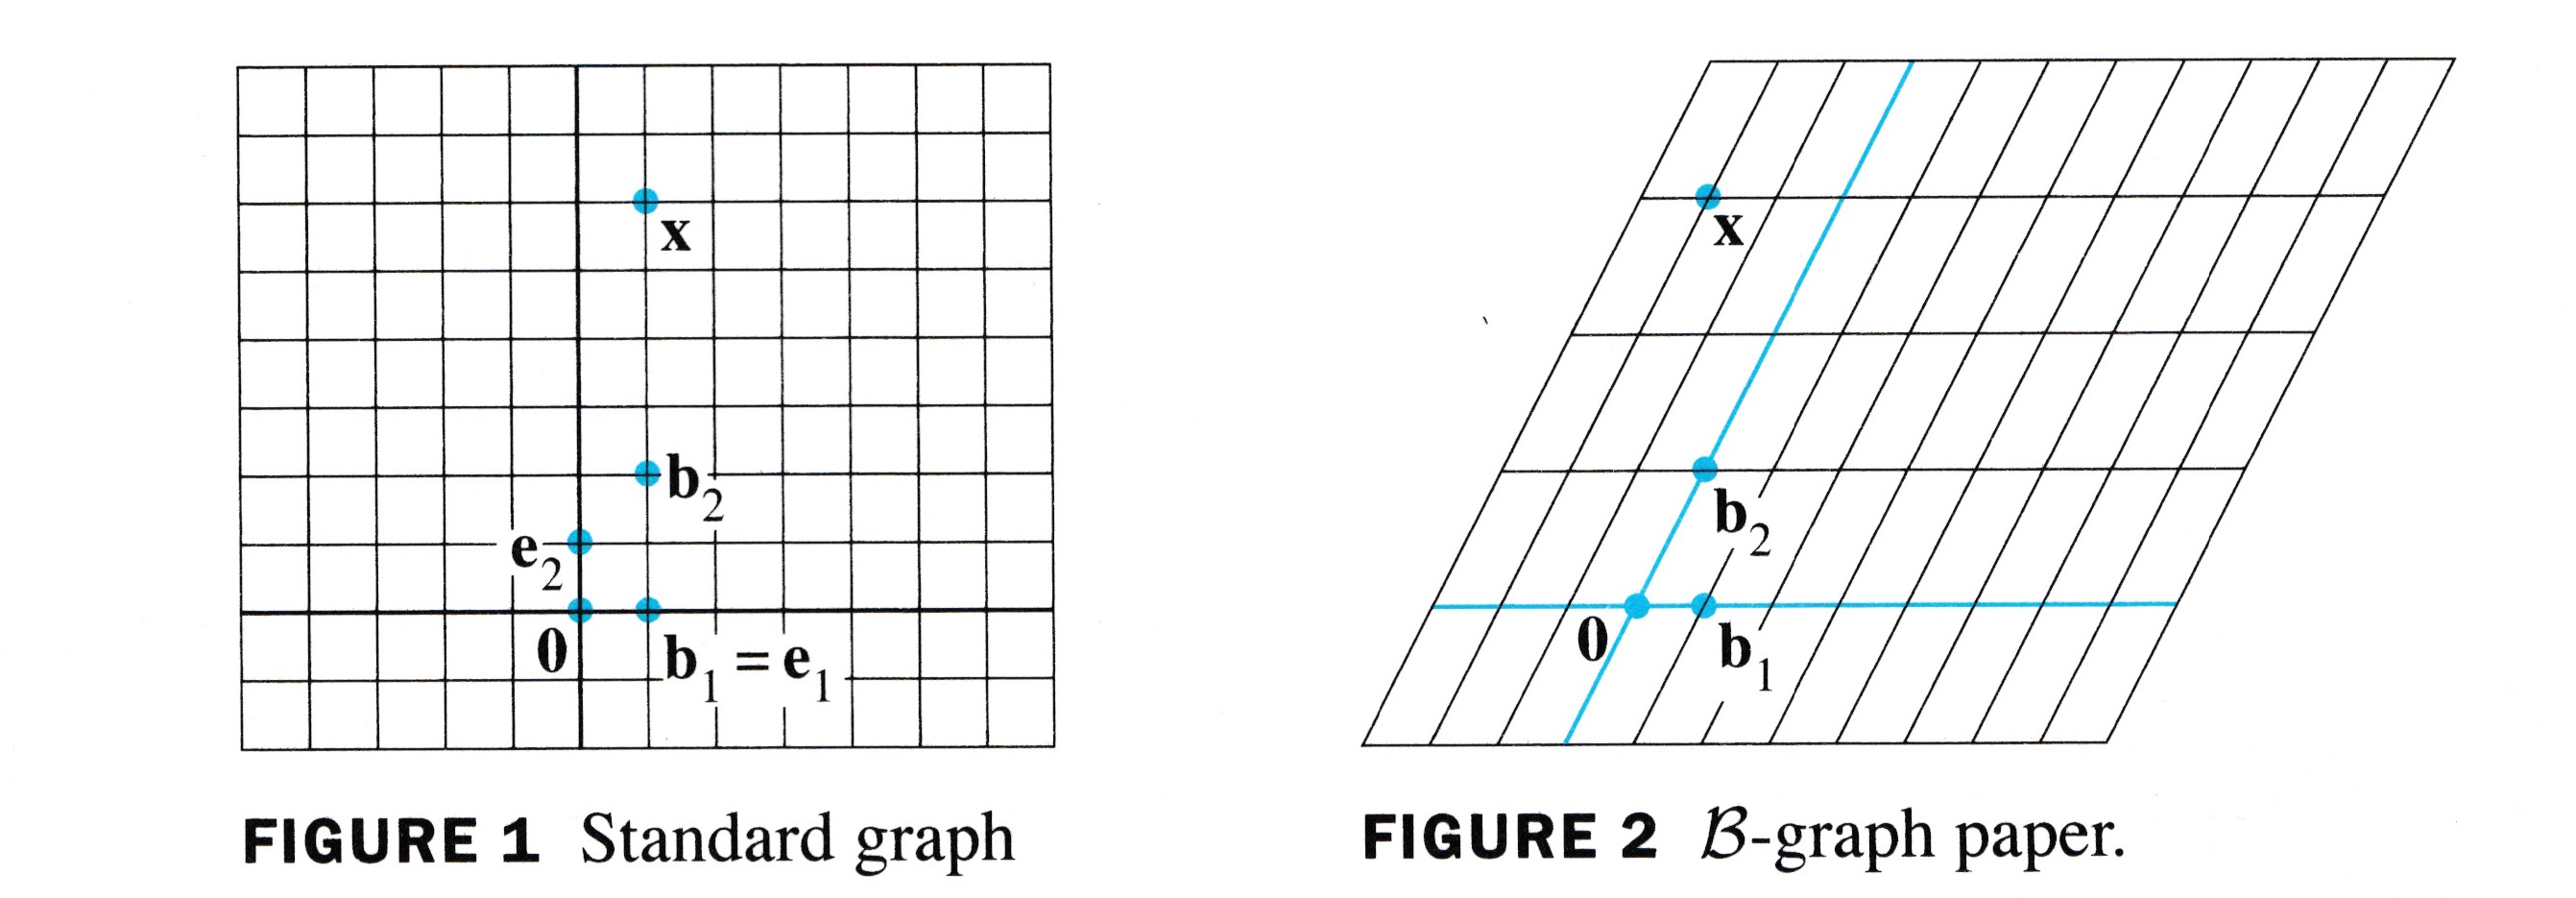

In [4]:
# Source: Lay, 4th Edition
display(Image("images/Lay-4-4-1.jpeg", width=750))

In [5]:
# idea: put a simple button here that switches between the two plots
xmin = -6.0 
xmax = 6.0 
ymin = -2.0
ymax = 8.0
fig = ut.two_d_figure('Figure 15.1', xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, size=(6,5))
for x in np.linspace(ymin, ymax, int(ymax-ymin+1)):
    fig.plotLinEqn(0., 1., x, alpha=0.3)
for y in np.linspace(xmin, xmax, int(xmax-xmin+1)):
    fig.plotLinEqn(1., 0., y, alpha=0.3)
fig.centerAxes()

<IPython.core.display.Javascript object>

__Example.__  Let $\vv_1 = \mat{{c}3\\6\\2}, \vv_2 = \mat{{r}-1\\0\\1}, \vx = \mat{{r}3\\12\\7},$ and $\setb = \{\vv_1,\vv_2\}.$

Then $\setb$ is a basis for $H$ = Span$\{\vv_1,\vv_2\}$ because $\vv_1$ and $\vv_2$ are linearly independent.

Determine if $\vx$ is in $H$, and if it is, find the coordinate vector of $\vx$ relative to $\setb.$

__Solution.__  If $\vx$ is in $H,$ then the following vector equation is consistent:

$$c_1\mat{{r}3\\6\\2} + c_2\mat{{r}-1\\0\\1} = \mat{{r}3\\12\\7}.$$

The scalars $c_1$ and $c_2,$ if they exist, are the $\setb$-coordinates of $\vx.$  

Row operations show that

$$\mat{{rrr}3&-1&3\\6&0&12\\2&1&7} \sim \mat{{rrr}1&0&2\\0&1&3\\0&0&0}.$$

Thus $c_1 = 2, c_2 = 3,$ and $[\vx]_\setb = \mat{{r}2\\3}.$  The basis $\setb$ determines a "coordinate system" on $H$, which can be visualized like this:

In [6]:
fig = ut.three_d_figure('Figure 15.2', fig_desc = 'A coordinate system on a subspace',
                        xmin = -1, xmax = 10, ymin = -1, ymax = 10, zmin = -1, zmax = 14, qr = qr_setting)
v = [3.0, 6, 2]
u = [-1,  0, 1]
#
v = np.array([2, 0.5, 0.5])
u = np.array([1.,  2,   1])
fig.text(v[0], v[1]-0.75, v[2]-2, r'$\bf v_1$', 'v1', size=16)
fig.text(u[0]-0.5, u[1], u[2]+2, r'$\bf v_2$', 'v2', size=16)
fig.text(3*u[0]+2*v[0], 3*u[1]+2*v[1], 3*u[2]+2*v[2]+1, r'$\bf 2v_1+3v_2$', '2 v1 + 3 v2', size=16)
# plotting the span of v
fig.plotSpan(u, v, 'Green')
# blue grid lines
fig.plotPoint(0, 0, 0, 'y')
fig.plotPoint(u[0], u[1], u[2], 'b')
fig.plotPoint(2*u[0], 2*u[1], 2*u[2],'b')
fig.plotPoint(3*u[0], 3*u[1], 3*u[2], 'b')
fig.plotLine([[0, 0, 0], 4*u], color='b')
fig.plotLine([v, v+4*u], color='b')
fig.plotLine([2*v, 2*v+3*u], color='b')
fig.plotLine([3*v, 3*v+2.5*u], color='b')
# red grid lines
fig.plotPoint(v[0], v[1], v[2], 'r')
fig.plotPoint(2*v[0], 2*v[1], 2*v[2], 'r')
fig.plotPoint(3*v[0], 3*v[1], 3*v[2], 'r')
fig.plotLine([[0, 0, 0], 3.5*v], color='r')
fig.plotLine([u, u+3.5*v], color='r')
fig.plotLine([2*u, 2*u+3.5*v], color='r')
fig.plotLine([3*u, 3*u+2*v], color='r')
#
fig.plotPoint(3*u[0]+2*v[0], 3*u[1]+2*v[1], 3*u[2]+2*v[2], color='m')
# plotting the axes
fig.plotIntersection([0,0,1,0], [0,1,0,0], color='Black')
fig.plotIntersection([0,0,1,0], [1,0,0,0], color='Black')
fig.plotIntersection([0,1,0,0], [1,0,0,0], color='Black')
fig.save('Fig15.2')
fig.ax.set_title('A coordinate system on a subspace',size=16);

<IPython.core.display.Javascript object>

__Important:__ Don't be confused by the fact that the "coordinate axes" are not purpendicular.   

The whole idea here is that __they don't need to be.__

As long as the independent vectors span the space, there is only __one__ way to express any point in terms of them.   Thus, every point has a unique coordinate.

__Isomorphism.__

Another important idea is that, although points in $H$ are in $\R^3$, they are completely determined by their coordinate vectors, which belong to $\R^2.$

The grid in the figure above makes $H$ "look like" $\R^2.$

The correspondence $\vx \mapsto [\vx]_\setb$ is one-to-one correspondence between $H$ and $\R^2$ that preserves linear combinations.

In our example, $\mat{{r}3\\12\\7}\mapsto  \mat{{r}2\\3}_\setb $.

When we have a one-to-one correspondence between two subspaces that preserves linear combinations, we call such a correspondence an _isomorphism,_ and we say that $H$ is _isomorphic_ to $\R^2.$

In general, if $\setb\ = \{\vb_1,\dots,\vb_p\}$ is a basis for $H$, then the mapping $\vx \mapsto [\vx]_\setb$ is a one-to-one correspondence that makes $H$ look and act the same as $\R^p.$   This is _even through the vectors in $H$ themselves may have more than $p$ entries._

## The Dimension of a Subspace

It can be shown that if a subspace $H$ has a basis of $p$ vectors, then every basis of $H$ must consist of exactly $p$ vectors.   Thus we can make this definition:

__Definition.__ The _dimension_ of a nonzero subspace $H,$ denoted by $\dim\ H,$ is the number of vectors in any basis for $H.$  

The dimension of the zero subspace $\{{\bf 0}\}$ is defined to be zero.

So now we can say __with precision__ things we've previous said informally.   For example, a plane through ${\bf 0}$ is two-dimensional, and a line through ${\bf 0}$ is one-dimensional.

__Question:__ What is the dimension of a line not through the origin?

__Answer:__ It is undefined, because a line not through the the origin is not a subspace.

__Example.__  We previously determined that the null space of this matrix:

$$A = \mat{{rrrrr}-3&6&-1&1&-7\\1&-2&2&3&-1\\2&-4&5&8&-4}$$

had a basis of 3 vectors.  So the dimension of $\nul\ A$, (or $\dim\nul\ A$) in this case is 3.

Remember that we constructed an explicit description of the nullspace of this matrix, as:

$$ = 
x_2\mat{{c}2\\1\\0\\0\\0}+x_4\mat{{r}1\\0\\-2\\1\\0}+x_5\mat{{r}-3\\0\\2\\0\\1} $$

Each basis vector corresponds to a free variable in the equation $A\vx = {\bf 0}.$   So, to find the dimension of $\nul\ A,$ simply identify and count the number of free variables in $A\vx = {\bf 0}.$ 

## Question Time!  Q15.1

__Definition.__  The __rank__ of a matrix, denoted by $\rank\ A,$ is the dimension of the column space of $A$.

Since the pivot columns of $A$ form a basis for $\col\ A,$ the rank of $A$ is just the number of pivot columns in $A$.

__Example.__  Determine the rank of the matrix

$$A = \mat{{rrrrr}2&5&-3&-4&8\\4&7&-4&-3&9\\6&9&-5&2&4\\0&-9&6&5&-6}.$$

__Solution__ Reduce $A$ to an echelon form:

$$A = \mat{{rrrrr}2&5&-3&-4&8\\0&-3&2&5&-7\\0&-6&4&14&-20\\0&-9&6&5&-6}\sim\cdots\sim\mat{{rrrrr}2&5&-3&-4&8\\0&-3&2&5&-7\\0&0&0&4&-6\\0&0&0&0&0}.$$

The matrix $A$ has 3 pivot columns, so $\rank\ A = 3.$

## Question Time! Q15.2

__The Rank Theorem.__

Consider a matrix $A.$

In the last lecture we showed the following: one can construct a basis for $\nul\ A$ using the columns corresponding to free variables in the solution of $A\vx = {\bf 0}.$   

This shows that $\dim\nul\ A$ = the number of free variables in $A\vx = {\bf 0},$  which is the number of non-pivot columns in $A$.

We also saw that the number of columns in any basis for $\col\ A$ is the number of pivot columns.

So we can now make this important connection:

$$\begin{array}{rcl}
\dim\nul\ A + \dim\col\ A &= &\mbox{number of non-pivot columns of $A$ + number of pivot columns of $A$}\\
&= &\mbox{number of columns of $A$}.
\end{array}$$



This leads to the following theorem:

If a matrix $A$ has $n$ columns, then $\rank\ A + \dim\nul\ A = n$.

This is a terrifically important fact!  

Here is an intuitive way to understand it.   Let's think about a matrix $A$ and the associated linear transformation $T(x) = Ax$.

If the matrix $A$ has $n$ columns, then $A$'s columnspace _could_ have dimension as high as $n$.   

In other words, $T$'s range _could_ have dimension as high as $n$.

_However,_ if $A$ "throws away" a nullspace of dimension $p$, then that _reduces_ the columnspace of $A$ to $n-p$.

Meaning, the dimension of $T$'s range is reduced to $n-p$.

## Question Time!  Q15.3

__Extending the Invertible Matrix Theorem.__

The above arguments show that when $A$ has $n$ columns, then the "larger" that the column space is, the "smaller" that the null space is.  

(Where "larger" means "has more dimensions.")

This is particularly important when $A$ is square $(n\times n)$.

Let's consider the extreme, in which the column space of $A$ has maximum dimension -- i.e., $\dim\col\ A= n.$

Recall that the IMT said that an $n\times n$ matrix is invertible if and only if its columns are linearly independent,  and if and only if its columns span $\R^n.$

Hence we now can see that an $n\times n$ matrix is invertible if and only if the columns of $A$ form a basis for $\R^n.$

This leads to the following facts, which further extend the IMT:

Let $A$ be an $n\times n$ matrix.  Then the following statements are each equivalent to the statement that $A$ is an invertible matrix:

1. The columns of $A$ form a basis for $\R^n.$
2. $\col\ A = \R^n.$
3. $\dim\col\ A = n.$
4. $\rank\ A = n.$
5. $\nul\ A = \{{\bf 0}\}.$
6. $\dim\nul\ A = 0.$